# IBTrACS Data

The IBTrACS, or International Best Track Archive for Climate Stewardship (IBTrACS) data contains a history of tropical storm data. It is stored by [NOAA's National Climatic Data Center (NCDC)](https://www.ncdc.noaa.gov/ibtracs/). Let's load the data and explore it in Python.

## Import Modules

Let's start by importing the modules we need.

In [1]:
from urllib import request
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Download the Data

Now we need to download the IBTrACS data. It isn't very large, so it shouldn't take too long.

In [2]:
# Set the basin to download
basin = 'NA'

# Set the URL
url = 'https://www.ncei.noaa.gov/data/'
url += 'international-best-track-archive-for-climate-stewardship-ibtracs/'
url += 'v04r01/access/csv/ibtracs.'+basin+'.list.v04r01.csv'

# Set the file path
file_path = '../data/ibtracs/ibtracs.'+basin+'.csv'

# Download the file if it doesn't already exists
if not os.path.exists(file_path):
    request.urlretrieve(url,file_path)

## Explore the Data

There are a lot of variables here, but we will only need a handful. Some of the pertinent variables and their descriptions are provided below (from the IBTrACS documentation):

<center>

Variable Name | Description
--- | ---
`numobs` | the number of observations for each storm
`sid` | a unique storm identifier (SID) assigned by IBTrACS algorithm
`season` | year the storm began
`number` | number of the storm for the year (restarts at 1 for each year)
`basin` | basin of the current storm position
`subbasin` | sub-basin of the current storm position
`name` | name of system give by source (if available)
`iso_time` | time of the observation in ISO format (YYYY-MM-DD hh:mm:ss)
`nature` | type of storm (a combination of the various types from the available sources)
`lat` | mean position - latitude (a combination of the available positions)
`lon` | mean position - longitude (a combination of the available positions)
`wmo_wind` | maximum sustained wind speed assigned by the responsible WMO agency
`wmo_pres` | minimum central pressure assigned by the responsible WMO agnecy
`track_type` | track type (main or spur). 
`dist2land` | current distance to land from current position
`landfall` | minimum distance to land over next 3 hours (=0 means landfall)
`iflag` | a flag identifying the type of interpolation used to fill the value at the given time
`storm_speed` | storm translation speed (knots)
`storm_dir` | storm translation direction (in degrees east of north)

</center>

We won't necessarily keep all of these, but it's good to know what these are. Now let's read in the data and have a look at the last few values.

In [3]:
# Read the data from the CSV
df = pd.read_csv(file_path,low_memory=False,skiprows=range(1,2))

# Only keep a handful of columns
keep_columns = ['SID','SEASON','NUMBER','NAME','ISO_TIME','BASIN',
                'NATURE','LAT','LON','WMO_WIND','WMO_PRES','TRACK_TYPE',
                'DIST2LAND','LANDFALL','IFLAG','STORM_SPEED','STORM_DIR']
df = df[keep_columns]

# Only keep the NA basin tracks
#df = df.loc[df['BASIN']=='NA'].copy()

# Convert time strings to datetimes for better querying
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])
df['SEASON'] = pd.to_numeric(df['SEASON'])
df['NUMBER'] = pd.to_numeric(df['NUMBER'])
df['LAT'] = pd.to_numeric(df['LAT'])
df['LON'] = pd.to_numeric(df['LON'])

# Show the last few records
df.tail()

,SID,SEASON,NUMBER,NAME,ISO_TIME,BASIN,NATURE,LAT,LON,WMO_WIND,WMO_PRES,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,STORM_SPEED,STORM_DIR
127644,2025291N11319,2025,93,MELISSA,2025-10-31 06:00:00,NaN,TS,34.4,-65.6,,,PROVISIONAL,898,827,O______________,42,45
127645,2025291N11319,2025,93,MELISSA,2025-10-31 09:00:00,NaN,TS,35.9,-63.9,,,PROVISIONAL,833,727,P______________,42,40
127646,2025291N11319,2025,93,MELISSA,2025-10-31 12:00:00,NaN,TS,37.5,-62.1,,,PROVISIONAL,719,635,O______________,41,40
127647,2025291N11319,2025,93,MELISSA,2025-10-31 15:00:00,NaN,TS,39.1,-60.5,,,PROVISIONAL,631,549,P______________,40,40
127648,2025291N11319,2025,93,MELISSA,2025-10-31 18:00:00,NaN,ET,40.6,-58.9,,,PROVISIONAL,541,,O______________,39,40


We can query the dataframe to make data analysis a bit easier. For example, let's see how many named storms are in each season.

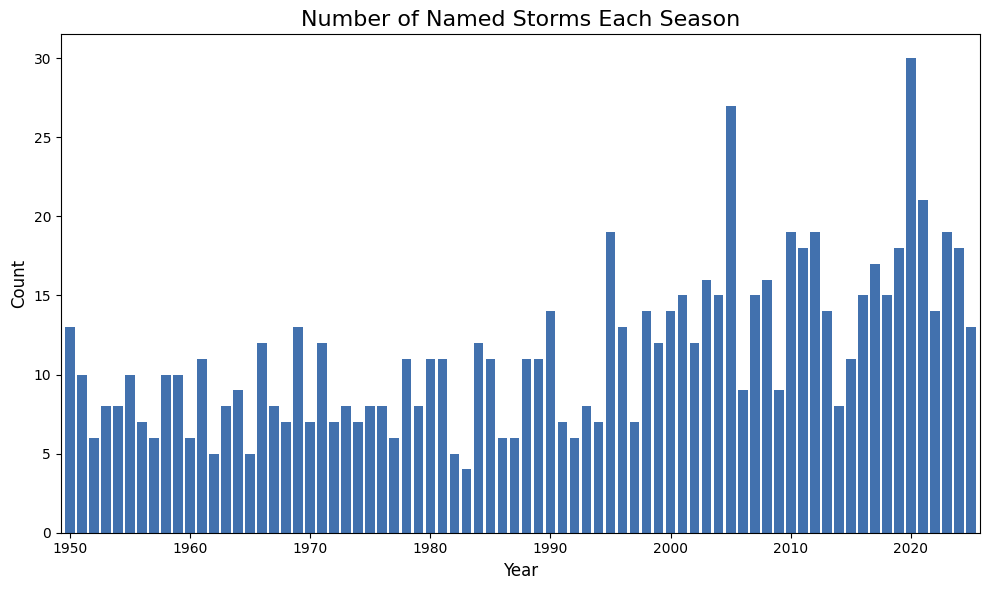

In [4]:
# Count the number of named storms in a season
df_named_counts = df[(df['NAME'] != 'NOT_NAMED') & (df['NAME'] != 'UNNAMED')].groupby(['SEASON']).agg({'NAME':'nunique'}).reset_index()

# Initialize the plot
fig,ax = plt.subplots(figsize=(10,6))

# Plot the counts
ax.bar(df_named_counts["SEASON"],df_named_counts["NAME"],color="#4271ae")

# Configure the plot
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Number of Named Storms Each Season",fontsize=16)
ax.set_xlim((df_named_counts["SEASON"].min()-0.75,df_named_counts["SEASON"].max()+0.75))
plt.tight_layout()

# Save the plot
file_path = '../images/named_storm_count.png'
fig.savefig(file_path)

We can also query seasons. Let's see the unique named storms this year.

In [5]:
df[(df['SEASON']==df['SEASON'].max()) & (df['NAME']!='NOT_NAMED') & (df['NAME']!='UNNAMED')].groupby("NAME").agg({"ISO_TIME":["first","last"]})

ISO_TIME                    
                        first                last
NAME                                             
ANDREA    2025-06-21 18:00:00 2025-06-25 12:00:00
BARRY     2025-06-27 00:00:00 2025-06-30 06:00:00
CHANTAL   2025-07-03 06:00:00 2025-07-08 00:00:00
DEXTER    2025-08-02 00:00:00 2025-08-07 12:00:00
ERIN      2025-08-08 12:00:00 2025-08-23 00:00:00
FERNAND   2025-08-20 12:00:00 2025-08-28 06:00:00
GABRIELLE 2025-09-14 12:00:00 2025-09-26 12:00:00
HUMBERTO  2025-09-22 12:00:00 2025-10-01 12:00:00
IMELDA    2025-09-22 12:00:00 2025-10-02 12:00:00
JERRY     2025-10-04 06:00:00 2025-10-11 18:00:00
KAREN     2025-10-08 00:00:00 2025-10-10 18:00:00
LORENZO   2025-10-11 00:00:00 2025-10-15 18:00:00
MELISSA   2025-10-17 12:00:00 2025-10-31 18:00:00

## Plot Tracks on a Map

Now let's plot the tracks over the past 20 years.

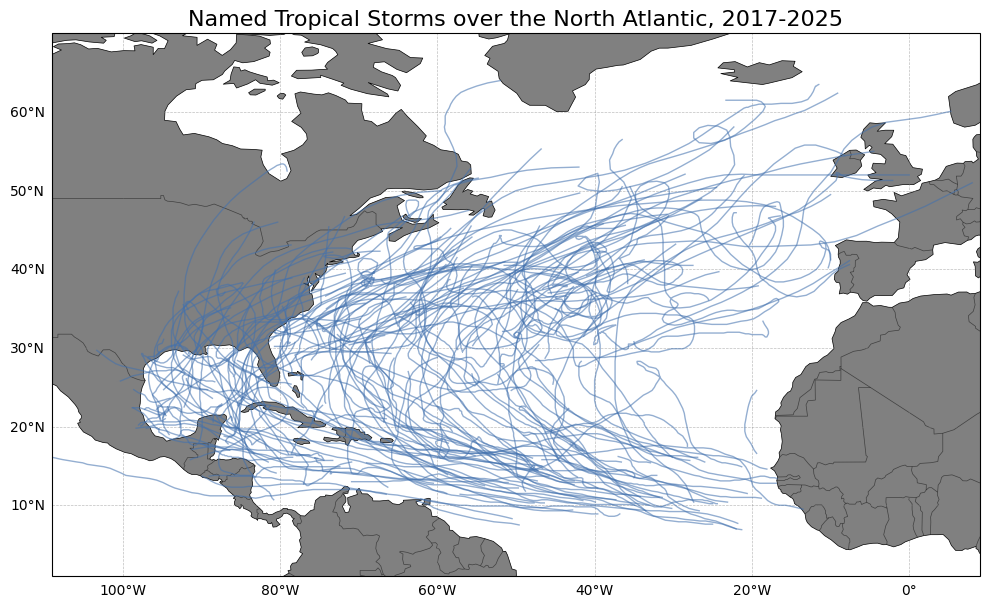

In [6]:
# Create figure and axis with Cartopy projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent (lon_min, lon_max, lat_min, lat_max)
ax.set_extent([-109, 9, 1, 70], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, facecolor='grey')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.5)

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Get all of the named storms in the last 20 years
df2 = df.loc[(df['SEASON'] >= 2017) & (df['NAME'] != "NOT_NAMED") & (df['NAME'] != "UNNAMED")]
year_min = df2['SEASON'].min()
year_max = df2['SEASON'].max()
plt.title(f"Named Tropical Storms over the North Atlantic, {year_min}-{year_max}", fontsize=16)

# Aggregate all of the latitudes and longitudes in a list
aggDict = {
    "LAT": list,
    "LON": list
}

# Group by and aggregate
df2 = df2.groupby(["SEASON", "NAME"]).agg(aggDict).reset_index()

# Add each track to the plot
for i, row in df2.iterrows():
    ax.plot(row["LON"], row["LAT"], 
            linewidth=1, 
            color='#4271ae90',
            transform=ccrs.PlateCarree())

# Save the plot
file_path = '../images/named_storm_tracks.png'
plt.tight_layout()
plt.savefig(file_path, dpi=150, bbox_inches='tight')
plt.show()

## Accumulated Cyclone Energy

Let's explore the data a bit more. Accumulated Cyclone Energy (ACE) is defined as the cummulative kinetic energy over the storm for every six hours when the winds are above 35 knots. As these numbers are often quite large, they are scaled down by a factor of 10000. Let's subset the whole IBTrACS to six-hourly data which winds below this threshold. It's a little more nuanced than what I'm doing here, but it's still roughly the same idea.

In [7]:
df = df[df['ISO_TIME'].dt.hour.isin([0,6,12,18])]
df["WMO_WIND"] = pd.to_numeric(df[df['WMO_WIND']!=" "]["WMO_WIND"])
df = df[df["WMO_WIND"]>=35]

Now let's subset the data and calculate the ACE based on the formula.

In [8]:
years = [i for i in range(df['SEASON'].min(),df['SEASON'].max()+1)]
ace = [(df[df["SEASON"]==year]['WMO_WIND']**2).sum()/10000. for year in years]

And now we can plot the results.

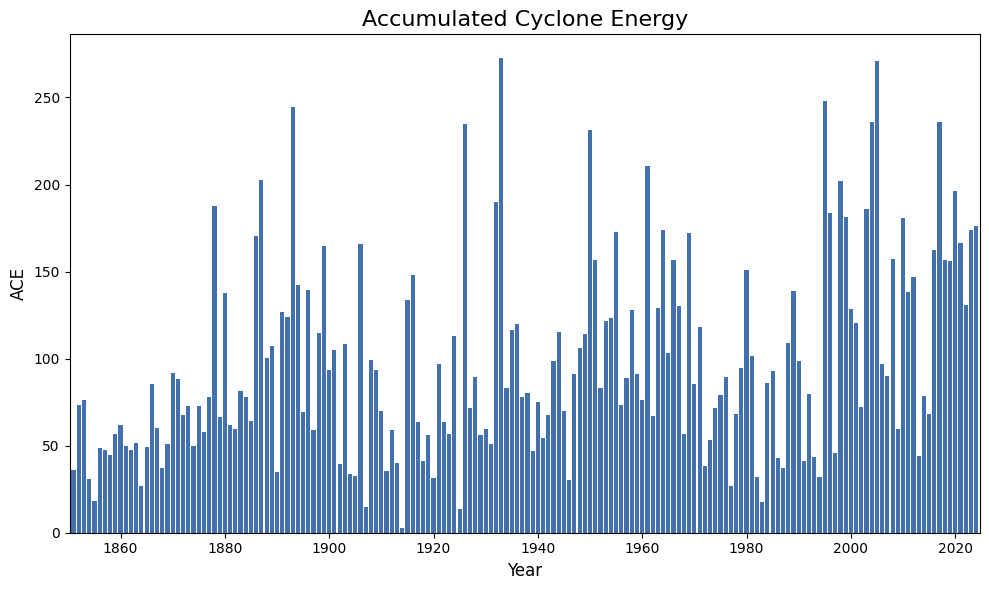

In [9]:
# Plot the ACE data
fig,ax = plt.subplots(figsize=(10,6),tight_layout=True);
ax.bar(years,ace,color="#4271ae");
ax.set_xlabel("Year",fontsize=12);
ax.set_ylabel("ACE",fontsize=12);
ax.set_title("Accumulated Cyclone Energy",fontsize=16);
ax.set_xlim(min(years)-0.75,max(years)+0.75);
plt.tight_layout()

# Save the plot
file_path = '../images/ace.png'
fig.savefig(file_path)

Let's have a look at the years with the largest ACE.

In [10]:
aceSorted = sorted(ace,reverse=True)
yearsSorted = [year for _,year in sorted(zip(ace,years),reverse=True)]
for aceValue,year in zip(aceSorted[:10],yearsSorted[:10]):
    print("Year",year,"\t Ace:",aceValue)

Year 1933 	 Ace: 272.635
Year 2005 	 Ace: 271.1
Year 1995 	 Ace: 248.14
Year 1893 	 Ace: 244.5925
Year 2004 	 Ace: 235.9775
Year 2017 	 Ace: 235.735
Year 1926 	 Ace: 234.5325
Year 1950 	 Ace: 231.21
Year 1961 	 Ace: 210.8725
Year 1887 	 Ace: 202.505
